In [ ]:
!pip install konlpy
import re
import konlpy
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
diabetes = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import export_graphviz
!pip install pydot

import pydot
from IPython.core.display import Image 

In [ ]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome
# 모델에서 독립변수와 종속변수를 각각 설정해주어야 한다.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1) 
#data를 train과 test셋으로 나누는 작업을 할 때 필요한 tool 사용

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
# clf라는 모델분석기를 만들고, train용으로 만든 독립변수셋과 종속변수셋을 fit 시킴

In [ ]:
diabetes_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_cols,
                                class_names = ["0","1"],
                                filled = True,
                                rounded = True, 
                                special_characters = True)
#fit된 clf를 그래픽으로 변환

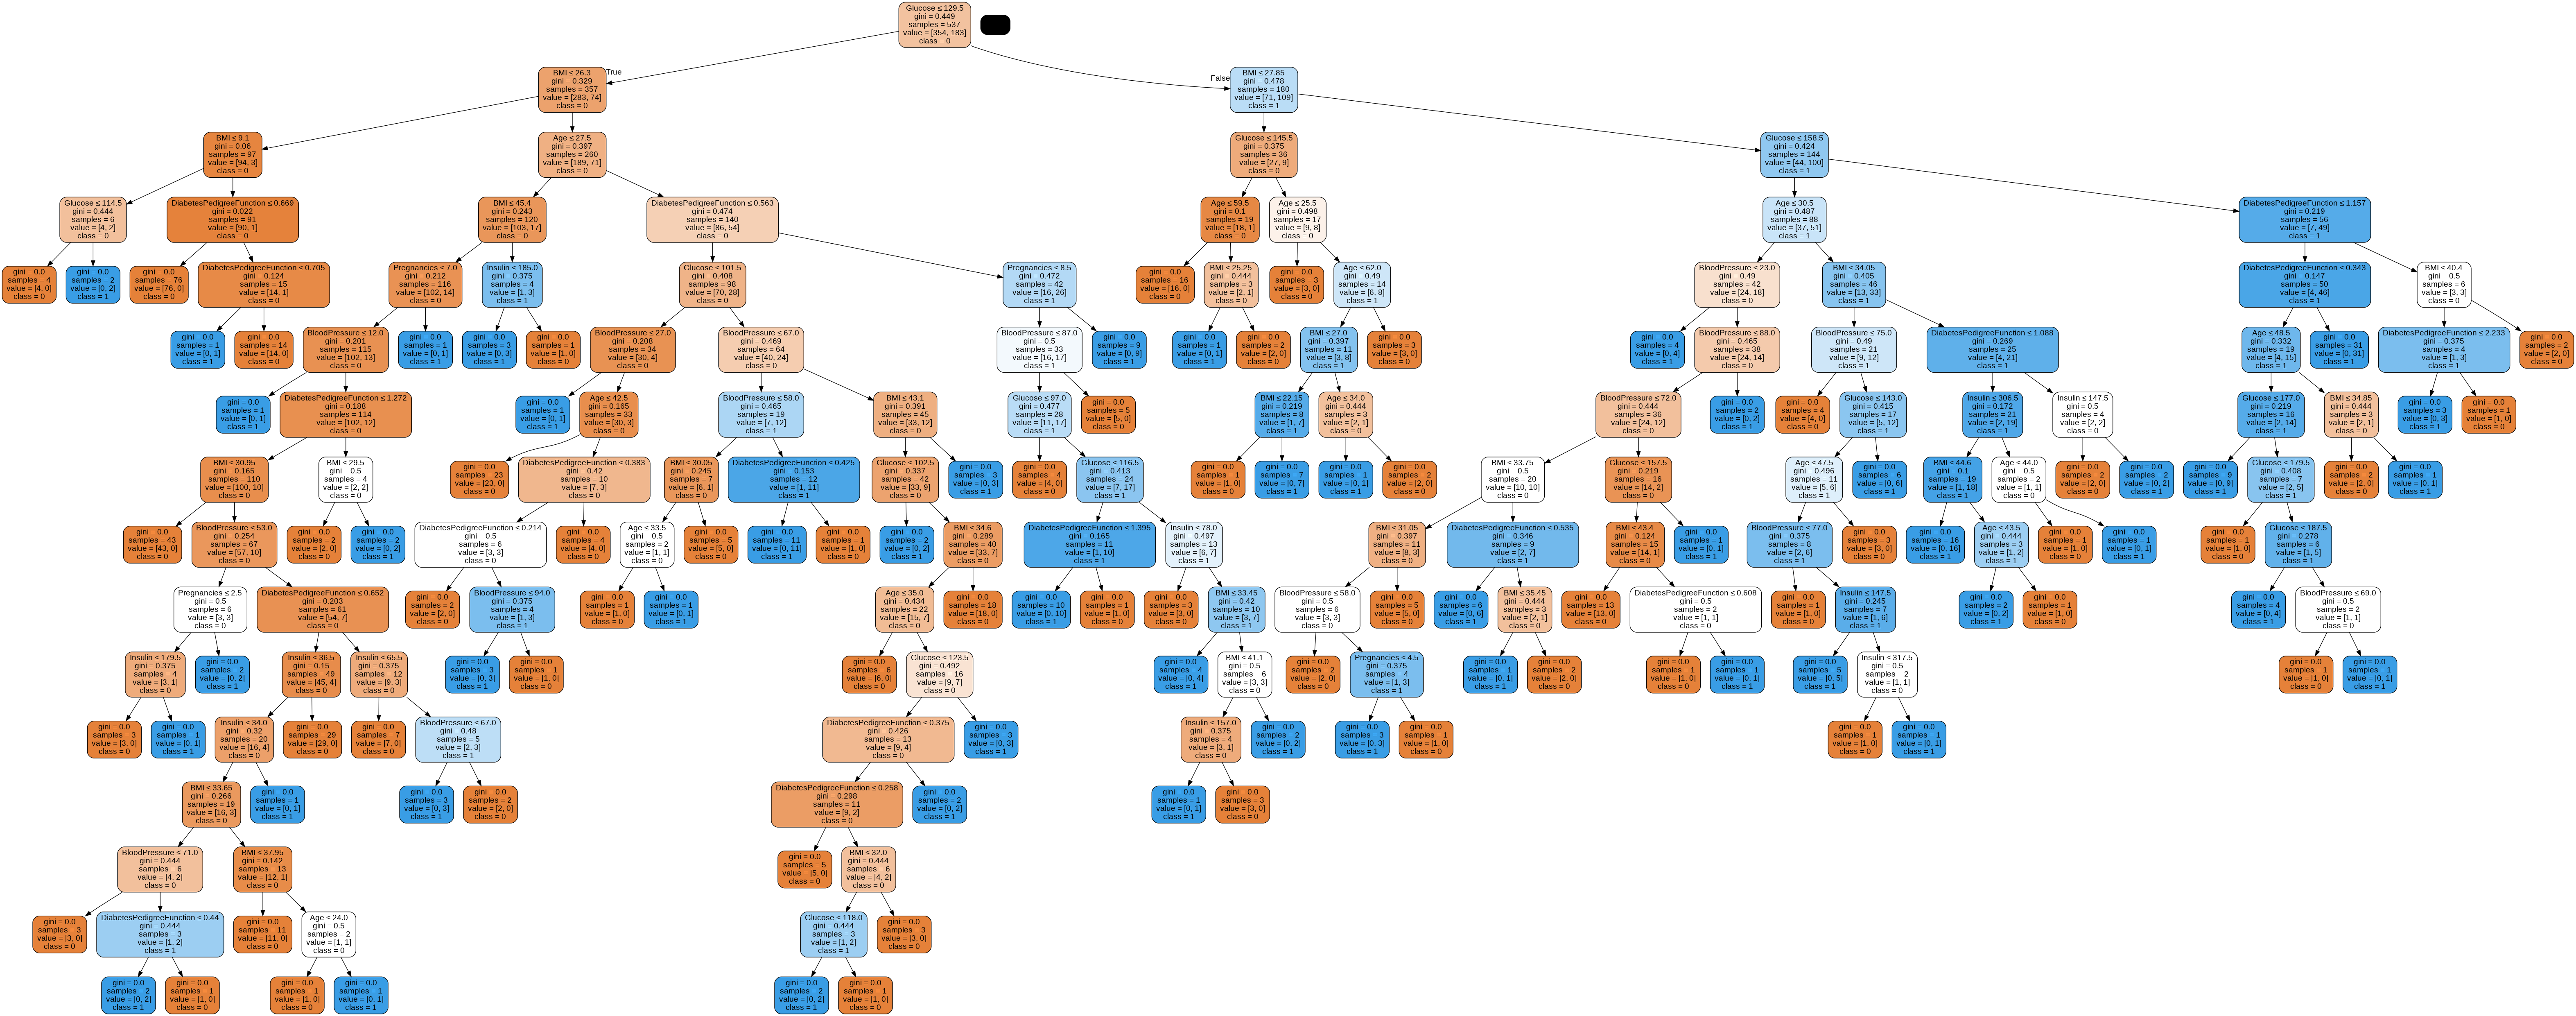

In [ ]:
graph = pydot.graph_from_dot_data(diabetes_data)[0]
image = graph.create_png()
Image(image)
#이미지로 변환

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
#만든 clf에 테스트독립변수셋을 input하여 모델이 내놓는 예측값과 테스트종속변수셋이 비슷할수록 모델의 정확도가 좋다고 말할 수 있음

[[112  34]
 [ 42  43]]
Accuracy: 0.670995670995671


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tree_nottuned = clf.fit(x_train, y_train)
#사전가지치기하지않은 fit된 clf를 만듦

In [ ]:
hyperparamters = {'max_depth': list(range(2, 8)),  'min_samples_split': list(range(2, 20))}
GridCV = GridSearchCV(estimator=tree_nottuned, param_grid=hyperparamters, cv=5, verbose=1)
GridCV.fit(x_train, y_train)
GridCV.best_params_ 
#hyperparameters로서 예상되는 range를 다 뽑아준 뒤, 가장 좋은 parameter를 선택

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': 4, 'min_samples_split': 2}

In [ ]:
tree_tuned = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=2, random_state=0)
#사전가지치기를 작업한 모델분석기 만듦

In [ ]:
tree_tuned = tree_tuned.fit(x_train, y_train)

In [ ]:
y_pred2 = tree_tuned.predict(x_test)
confusion_matrix(y_test, y_pred2)
print(confusion_matrix(y_test, y_pred2))
print("AccuracyAfterPruning:", metrics.accuracy_score(y_test,y_pred2))
#사전가지치기를 적용한 모델의 경우 예측 정확도가 올라가는 것을 확인할 수 있음.

[[124  22]
 [ 31  54]]
AccuracyAfterPruning: 0.7705627705627706
